## Práctica 4

In [2]:
# importamos librerias
try:
    from gapminder import gapminder
except:
    %pip install gapminder
    from gapminder import gapminder

from formulaic import Formula
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

plt.style.use("dark_background")


### Ejercicio 1

A) Implementar una función que calcule la pendiente y la ordenada al origen de la recta de regresión lineal con las fórmulas vistas en clase.

In [3]:
def coefs_rl(x, y):
    beta_1 = np.sum((x - x.mean())*(y - y.mean()))/np.sum((x - x.mean())**2)
    beta_0 = y.mean() - beta_1 * x.mean()
    return beta_1, beta_0


B) Con el dataset gapminder, utilizar la función implementada en el item anterior para
realizar una regresión lineal entre los años y la expectiva de vida en Argentina. Comparar
los coeficientes con los obtenidos por scikit-learn.

In [4]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
# agarramos los datos de argentina y vemos que coinciden con los de la función!
datos = gapminder[gapminder["country"] == "Argentina"]
print(coefs_rl(datos["year"], datos["lifeExp"]))
y, X = Formula('lifeExp ~ year').get_model_matrix(datos)
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X, y)
print(modelo.coef_)

(0.2317083916083916, -389.6063445221445)
[[-3.89606345e+02  2.31708392e-01]]


### Ejercicio 3
En este ejercicio trabajaremos con el dataset de inmuebles (inmuebles.csv en la página de la materia). El dataset contiene datos sobre inmuebles que están a la venta en cierta ciudad: su superficie en m2, su precio en millones de pesos y la zona de la ciudad donde se encuentra.  Recordar como cargar un dataset desde un .csv y visualizar sus primeras filas:

In [6]:
datos = pd.read_csv('./data/inmuebles.csv')
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


(a) Realizar un gráfico de dispersión (scatterplot) que muestre la relación entre la superficie
y el precio de cada imueble.

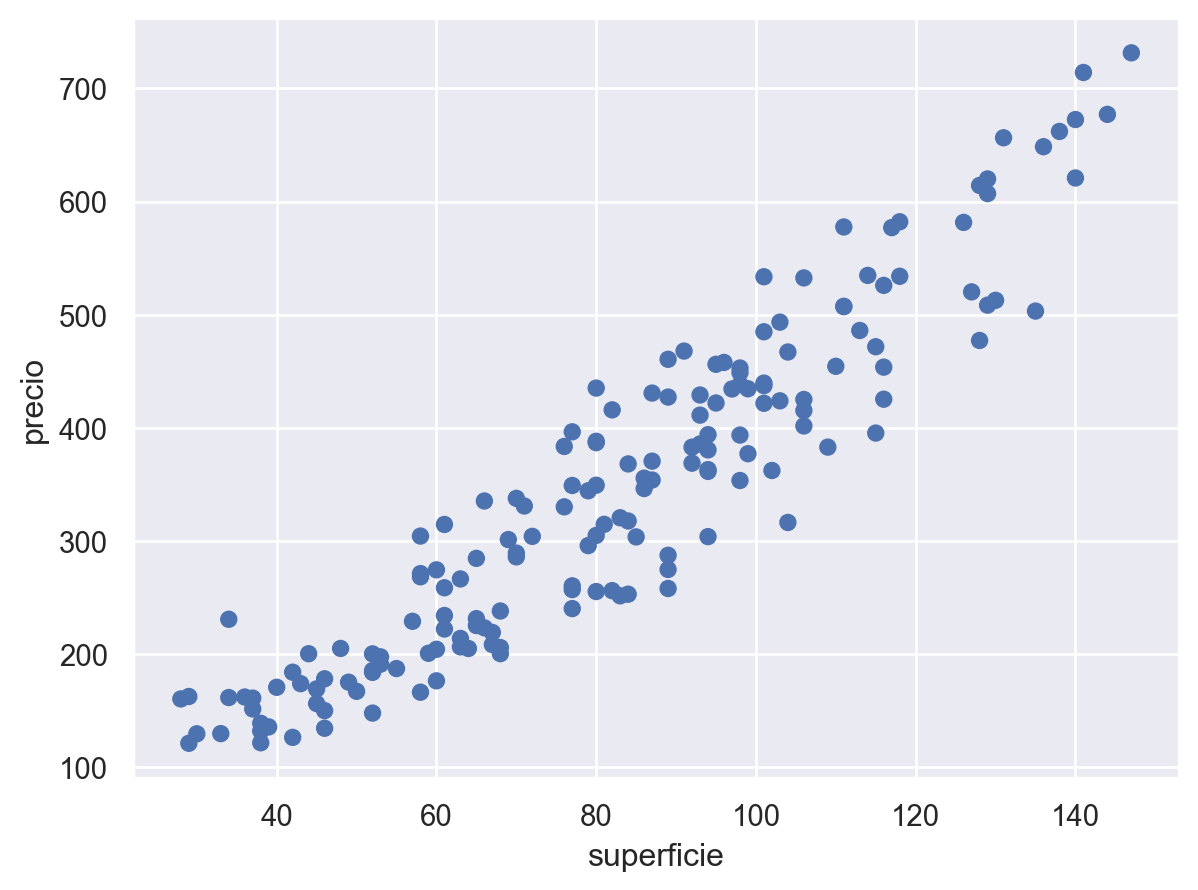

In [7]:
(
    so.Plot(data=datos, x='superficie', y='precio')
    .add(so.Dot())
)

(b) Realizar un gráfico de la regresión lineal entre ambas variables. El gráfico debe titularse “Datos inmobiliarios” y la recta de Regresión Lineal debe tener una leyenda que diga “Regresión”.

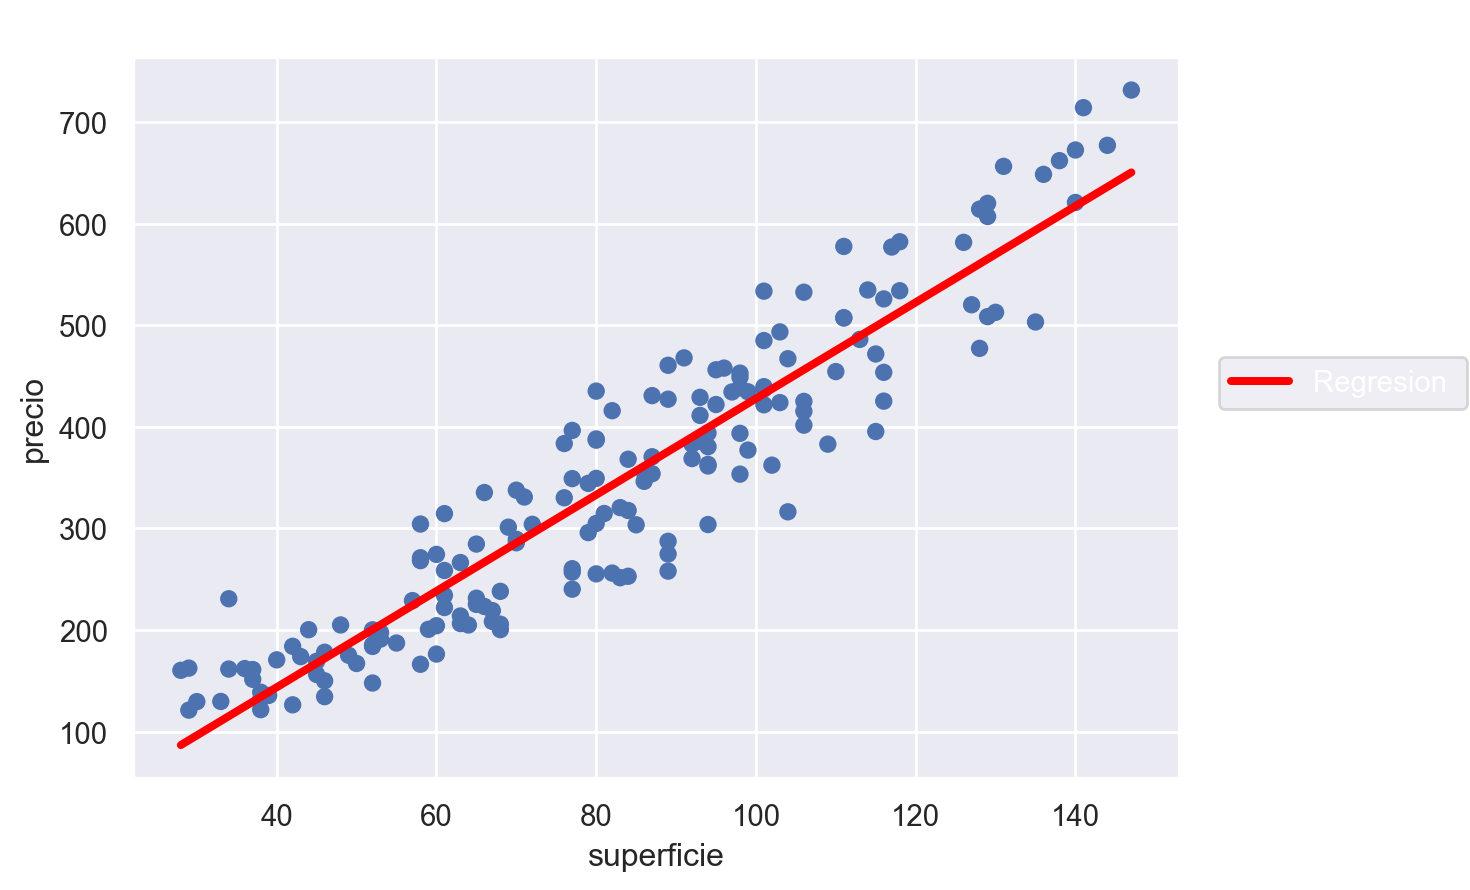

In [8]:
(
    so.Plot(data=datos, x="superficie", y="precio")
    .add(so.Dot())
    .add(so.Line(color="red", linewidth=3), so.PolyFit(1), label="Regresion ")
    .label(title="Datos Inmobiliarios")
)

(c) Calcular los coeficientes de la recta que mejor ajusta a los datos. Según el modelo, ¿qué podríamos interpretar sobre el costo del metro cuadrado en la ciudad?

(f) Comparar los resultados obtenidos en el ítem anterior con los proporcionados por r2_score y mean_squared_error de scikit-learn

In [9]:
y, X = Formula('precio ~ superficie').get_model_matrix(datos)
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X, y)
print(modelo.coef_)

[[-45.73153403   4.73579682]]


In [10]:
y_pred = modelo.predict(X)
print("R2:",r2_score(y, y_pred))
print("MSE:",mean_squared_error(y, y_pred))

R2: 0.8762114698357936
MSE: 2630.9300019446955


(g) Mediante la confección de un boxplot, decidir en cuál de las zonas hay mayor variabilidad de precios. ¿Hay algún outlier?

No parece haber ningún outlier! 

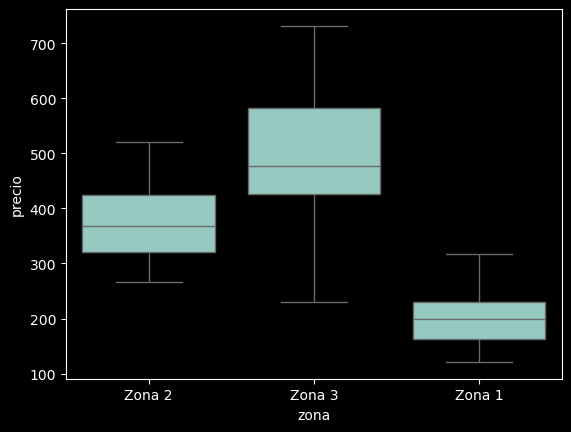

In [28]:
sns.boxplot(data=datos, x="zona", y="precio")
plt.show()

(h) Para cada una de las zonas de la ciudad, calcular los coeficientes, el ECM y R2 de la recta que mejor aproxima a los datos.

========== Zona 2 ==========
R2: 0.866027281146202
MSE: 611.4955812522102
========== Zona 3 ==========
R2: 0.9445652745220187
MSE: 748.8800907160435
========== Zona 1 ==========
R2: 0.855923919218176
MSE: 331.2274677047097


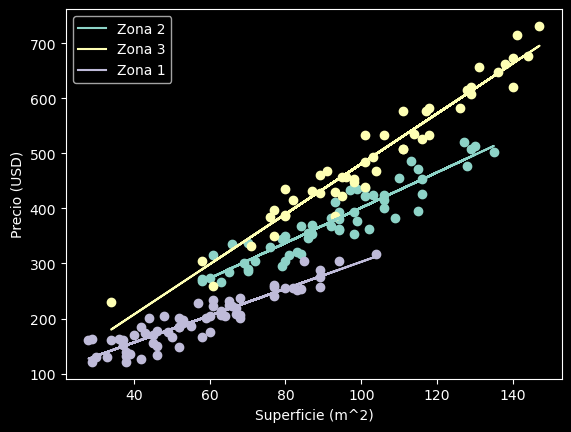

In [ ]:
zonas = datos["zona"].unique()
coef = {}
for zona in zonas:
    y, X = Formula('precio ~ superficie').get_model_matrix(datos[datos["zona"] == zona])
    modelo = linear_model.LinearRegression(fit_intercept=False)
    modelo.fit(X, y)
    coefs = modelo.coef_[0]
    coef[zona] = coefs
    y_pred = modelo.predict(X)

    print("="*10, zona, "="*10)
    print("R2:", r2_score(y, y_pred))
    print("MSE:", mean_squared_error(y, y_pred))

    plt.scatter(X['superficie'],y) # original data
    plt.plot(X['superficie'],coefs[0]+X['superficie']*coefs[1], label=zona) # line
    plt.xlabel("Superficie (m^2)")
    plt.ylabel("Precio (USD)")
    plt.legend()

Vemos que tenemos unos valores de $R^2$ con valores cercanos a $0.9$, por lo que el ajuste parece ser muy bueno.

(i) Graficar los datos y el ajuste lineal de cada zona utilizando el método facet() de Plot() (recordar ejercicio 5.b de la práctica 3) ¿Cuál es el valor del metro cuadrado en cada zona?  ¿Qué podemos concluir si comparamos estos valores con lo obtenido en el ítem c) ?